In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Задача классификации



## Датасет-пример: пятна

In [ ]:
from sklearn.datasets import make_blobs
blobs_X, blobs_y = make_blobs(n_samples=1000, centers=[[-2, 2],[1, -1]], cluster_std=1, random_state=13)

colors = ("red", "k")
colored_y = np.zeros(blobs_y.size, dtype=str)

for i, cl in enumerate([0,1]):
    colored_y[blobs_y == cl] = str(colors[i])
    
plt.figure(figsize=(15,10))
plt.scatter(blobs_X[:, 0], blobs_X[:, 1], c=colored_y, edgecolors='K', s=80)
plt.legend()
plt.show()

## Датасет [Титаник](https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html)

In [ ]:
!wget -c https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv

In [ ]:
ls 

In [ ]:
df = pd.read_csv('titanic.csv')

In [ ]:
df.shape

In [ ]:
df.sample(5)

In [ ]:
plt.figure(figsize=(8, 8))
df.Survived.value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

In [ ]:
df.isna().sum()

In [ ]:
features = ["Pclass", "Sex", "Siblings/Spouses Aboard", "Parents/Children Aboard"]

In [ ]:
df

In [ ]:
y = df.Survived.values
X = df[features]
X

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

# Деревья решений

*   В каждой вершине дерева находится вопрос
*   В зависимости от ответа на вопрос, алгоритм направляется в нужную ветвь  дерева
*   Листы дерева соответствуют решению алгоритма

<img src=https://hsto.org/files/194/9b6/ae9/1949b6ae97ab4fc9b1a37fbf182eda8f.gif width=500/>

<img src=https://upload.wikimedia.org/wikipedia/commons/e/eb/Decision_Tree.jpg width=500/>


$$
\begin{aligned}
\frac{L}{Q} H(p_{L}) + \frac{R}{Q} H(p_{R}) \rightarrow \min
\end{aligned}
$$

$ Q - $ число объектов в вершине     
$ L - $ количество объектов первого класса   
$ R - $ число объектов второго класса  
$ p_{L} - $ доля объектов 1-го класса в левой дочерней вершине  
$ p_{R} - $ доля объектов 1-го класса в правой дочерней вершине  


Энтропия:
$$
\begin{aligned}
H(q) &= -q \log q - (1-q) \log (1 - q)
\end{aligned}
$$

Индекс Джини:
$$
\begin{aligned}
H(q) &= 4q(1-q)
\end{aligned}
$$

In [ ]:
from sklearn.tree import DecisionTreeClassifier

first_tree = DecisionTreeClassifier(random_state=13, max_depth=2)
first_tree

## Датасет Титаник

In [ ]:
try:
  first_tree.fit(X_train, y_train)
except Exception as e:
  print(e)

In [ ]:
df

In [ ]:
pd.get_dummies(df['Sex'], prefix="Sex")

In [ ]:
df[features]

In [ ]:
X = pd.concat([df[features], pd.get_dummies(df['Sex'], prefix="Sex")], axis=1).drop(['Sex'], axis=1)
X

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

In [ ]:
first_tree.fit(X_train, y_train)

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(first_tree, out_file='first_tree.dot', feature_names=X_train.columns, class_names=['Not survived', 'Survived'], filled=True)

In [ ]:
!cat first_tree.dot

In [ ]:
import graphviz
from IPython.core.display import display

with open("first_tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

## Датасет-пример: пятна

In [ ]:
from sklearn.tree import export_graphviz

blob_tree = DecisionTreeClassifier(random_state=13, max_depth=3)
blob_tree.fit(blobs_X, blobs_y)
graphviz.Source(export_graphviz(blob_tree, filled=True, class_names=['0', '1']))


In [ ]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

plt.figure(figsize=(15,8))

eps = 0.1
xx, yy = np.meshgrid(np.linspace(np.min(blobs_X[:,0]) - eps, np.max(blobs_X[:,0]) + eps, 500),
                     np.linspace(np.min(blobs_X[:,1]) - eps, np.max(blobs_X[:,1]) + eps, 500))

Z = blob_tree.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', 'grey'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(blobs_X[:, 0], blobs_X[:, 1], c=colored_y, edgecolors='K')
plt.show()

## Оценка точности классификации

In [ ]:
y_pred = first_tree.predict(X_test)

error = 0
confusion_matrix = np.zeros([2,2], int)
for i in range(X_test.shape[0]):
    confusion_matrix[y_test[i], y_pred[i]] += 1
    if y_test[i] != y_pred[i]:
        error +=1

print("\nErrors in validation set: " ,error)
print("\nError Persentage : " ,(error*100)/y_pred.shape[0])
print("\nAccuracy : " ,100-(error*100)/y_pred.shape[0])
print("\nValidation set Shape :",y_pred.shape[0])

In [ ]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score
y = [1] * 9 + [0]
pred = [1] * 10
y, pred


In [ ]:
accuracy_score(y, pred), balanced_accuracy_score(y, pred)

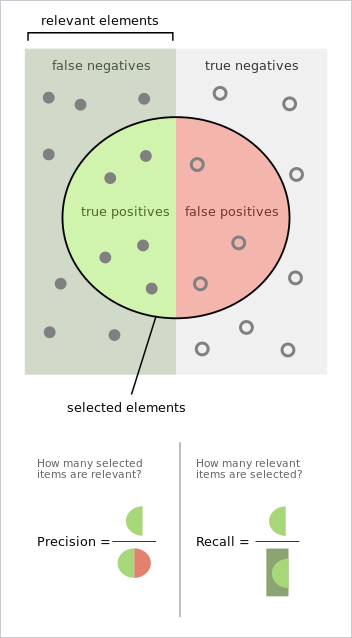

In [ ]:
recall_score([1,1,1,0,0,0], [1,1,0,1,0,0]), recall_score([1,1,1,0,0,0], [1,1,1,1,1,1]), recall_score([1,1,1,0,0,0], [1,0,0,0,0,0])

In [ ]:
precision_score([1,1,1,0,0,0], [1,1,0,1,0,0]), precision_score([1,1,1,0,0,0], [1,1,1,1,1,1]), precision_score([1,1,1,0,0,0], [1,0,0,0,0,0])

In [ ]:
f1_score([1,1,1,0,0,0], [1,1,0,1,0,0]), f1_score([1,1,1,0,0,0], [1,1,1,1,1,1]), f1_score([1,1,1,0,0,0], [1,0,0,0,0,0])

In [ ]:
f = plt.figure(figsize=(10,8.5))
f.add_subplot(111)

plt.imshow(np.log2(confusion_matrix+1), cmap="BuGn")
plt.colorbar()
plt.tick_params(size=5,color="white")
plt.xticks(np.arange(0,2),np.arange(0,2))
plt.yticks(np.arange(0,2),np.arange(0,2))

threshold = confusion_matrix.max()/2 

for i in range(2):
    for j in range(2):
        plt.text(j,i,int(confusion_matrix[i,j]),horizontalalignment="center",color="white" if confusion_matrix[i, j] > threshold else "black")
        
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
sns.heatmap(confusion_matrix, annot=True, fmt="d", square=True)

## Подбор метапараметров

In [ ]:
depths = np.arange(1, 21)
features = [.25, .5, .7, 1]
tree_params = {'max_depth': depths,  'max_features': features}

In [ ]:
from sklearn.model_selection import GridSearchCV

tree_grid = GridSearchCV(DecisionTreeClassifier(), tree_params, cv=10, n_jobs=-1)

In [ ]:
try:
  tree_grid.fit(X_train, y_train)
  tree_grid.best_score_, tree_grid.best_params_
except Exception as e:
  print(e)

In [ ]:
tree_bp = DecisionTreeClassifier(max_depth=4, max_features=0.25, random_state=13)

In [ ]:
tree_bp.fit(X_train, y_train)

In [ ]:
export_graphviz(tree_bp, out_file='tree_bp.dot', feature_names=X_train.columns, class_names=['Not survived', 'Survived'], filled=True)

with open("tree_bp.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [ ]:
y_pred = tree_bp.predict(X_test)

error = 0
confusion_matrix = np.zeros([2,2])
for i in range(X_test.shape[0]):
    confusion_matrix[y_test[i], y_pred[i]] += 1
    if y_test[i] != y_pred[i]:
        error +=1

print("\nErrors in validation set: " ,error)
print("\nError Persentage : " ,(error*100)/y_pred.shape[0])
print("\nAccuracy : " ,100-(error*100)/y_pred.shape[0])
print("\nValidation set Shape :",y_pred.shape[0])

In [ ]:
f = plt.figure(figsize=(10,8.5))
f.add_subplot(111)

plt.imshow(np.log2(confusion_matrix+1), cmap="BuGn")
plt.colorbar()
plt.tick_params(size=5,color="white")
plt.xticks(np.arange(0,2),np.arange(0,2))
plt.yticks(np.arange(0,2),np.arange(0,2))

threshold = confusion_matrix.max()/2 

for i in range(2):
    for j in range(2):
        plt.text(j,i,int(confusion_matrix[i,j]),horizontalalignment="center",color="white" if confusion_matrix[i, j] > threshold else "black")
        
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Метод k-ближайших соседей

<img src="https://www.kdnuggets.com/wp-content/uploads/popular-knn-metrics-0.png">


## Датасет-пример: пятна

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
blob_knn = KNeighborsClassifier(n_neighbors=1)
blob_knn.fit(blobs_X, blobs_y)

plt.figure(figsize=(15,8))

eps = 0.1
xx, yy = np.meshgrid(np.linspace(np.min(blobs_X[:,0]) - eps, np.max(blobs_X[:,0]) + eps, 500),
                     np.linspace(np.min(blobs_X[:,1]) - eps, np.max(blobs_X[:,1]) + eps, 500))

Z = blob_knn.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', 'grey'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(blobs_X[:, 0], blobs_X[:, 1], c=colored_y, edgecolors='K')
plt.show()

## Датасет MNIST

In [ ]:
cat /content/sample_data/README.md

In [ ]:
mnist_train = pd.read_csv('/content/sample_data/mnist_train_small.csv', header=None)
mnist_test = pd.read_csv('/content/sample_data/mnist_test.csv', header=None)

In [ ]:
mnist_train.sample(4)

In [ ]:
mnist_train.shape

In [ ]:
from sklearn import datasets

digits = datasets.load_digits()

In [ ]:
digits

In [ ]:
digits.keys()

In [ ]:
digits.DESCR

In [ ]:
images = digits.images
targets = digits.target

images[0].shape

In [ ]:
from tensorflow import keras

(x_train, labels_train), (x_test, labels_test) = keras.datasets.mnist.load_data()

In [ ]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_test, labels_test, test_size=0.25, random_state=13)

In [ ]:
print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

In [ ]:
labels_train[0], x_train[0]

In [ ]:
print(y_train[0])
plt.imshow(X_train[0], cmap="Greys_r")
plt.show()

In [ ]:
plt.figure(figsize=(12,10))
x, y = 10, 4
for i in range(40):  
    plt.subplot(y, x, i+1)
    plt.imshow(X_train[i], cmap="Greys_r")
plt.show()

In [ ]:
sns.countplot(x=y_train)
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)

In [ ]:
try:
  knn.fit(X_train, y_train)
except Exception as e:
  print(e)

In [ ]:
X_train.shape

In [ ]:
y = y_train
X = X_train.reshape(-1, 28*28)
X.shape

In [ ]:
knn.fit(X, y)

In [ ]:
print(y_test[0])
plt.imshow(X_test[0], cmap="Greys_r")
plt.show()

In [ ]:
knn.predict(np.expand_dims(X_test[0].reshape(28*28), axis=0))

In [ ]:
n_x, n_y = 15, 5
n = n_x * n_y
plt.figure(figsize=(30,12))

img_ids = np.random.randint(X_test.shape[0], size=n)

for i, id in zip(np.arange(n), img_ids):  
    plt.subplot(n_y, n_x, i+1)
    plt.imshow(X_test[id], cmap="Greys_r")
    y_pred = knn.predict(np.expand_dims(X_test[id].reshape(28*28), axis=0))[0]
    plt.subplots_adjust(wspace=0.85)
    plt.title(f'ID: {id} \n Pred label: {y_pred} \n True label: {y_test[id]}')
plt.show()

In [ ]:
y_pred = knn.predict(X_test.reshape(-1, 28*28))

error = 0
confusion_matrix = np.zeros([10,10])
for i in range(X_test.shape[0]):
    confusion_matrix[y_test[i], y_pred[i]] += 1
    if y_test[i] != y_pred[i]:
        error +=1

print("\nErrors in validation set: " ,error)
print("\nError Persentage : " ,(error*100)/y_pred.shape[0])
print("\nAccuracy : " ,100-(error*100)/y_pred.shape[0])
print("\nValidation set Shape :",y_pred.shape[0])

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
f = plt.figure(figsize=(10,8.5))
f.add_subplot(111)

plt.imshow(np.log2(confusion_matrix+1),cmap="Reds")
plt.colorbar()
plt.tick_params(size=5,color="white")
plt.xticks(np.arange(0,10),np.arange(0,10))
plt.yticks(np.arange(0,10),np.arange(0,10))

threshold = confusion_matrix.max()/2 

for i in range(10):
    for j in range(10):
        plt.text(j,i,int(confusion_matrix[i,j]),horizontalalignment="center",color="white" if confusion_matrix[i, j] > threshold else "black")
        
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Подбор числа соседей

In [ ]:
param_grid = {'n_neighbors': np.arange(1, 4)}
knn_gscv = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
knn_gscv.fit(X_train.reshape(-1, 28*28), y_train)

In [ ]:
knn_gscv.best_params_

In [ ]:
knn2 = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn2.fit(X, y)

In [ ]:
y_pred = knn2.predict(X_test.reshape(-1, 28*28))

error = 0
confusion_matrix = np.zeros([10,10])
for i in range(X_test.shape[0]):
    confusion_matrix[y_test[i], y_pred[i]] += 1
    if y_test[i] != y_pred[i]:
        error +=1

print("\nErrors in validation set: " ,error)
print("\nError Persentage : " ,(error*100)/y_pred.shape[0])
print("\nAccuracy : " ,100-(error*100)/y_pred.shape[0])
print("\nValidation set Shape :",y_pred.shape[0])

In [ ]:
f = plt.figure(figsize=(10,8.5))
f.add_subplot(111)

plt.imshow(np.log2(confusion_matrix+1),cmap="Reds")
plt.colorbar()
plt.tick_params(size=5,color="white")
plt.xticks(np.arange(0,10),np.arange(0,10))
plt.yticks(np.arange(0,10),np.arange(0,10))

threshold = confusion_matrix.max()/2 

for i in range(10):
    for j in range(10):
        plt.text(j,i,int(confusion_matrix[i,j]),horizontalalignment="center",color="white" if confusion_matrix[i, j] > threshold else "black")
        
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Задание

1. Применить классификацию деревом решений с заданным max_depth к своему датасету. Построить график зависимости accuracy на тренировочном и тестовом поднаборах от max_depth дерева.
2. Найти GridSearchCV оптимальный max_depth.